# Final Project : Networks in Dolphin Communities of Doubtful Sound
## Finn O'Connor, Charlie Kauffman, Andrew Dean


In [14]:
#Imports the necessary packages to graph our network

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Learning About the Network

What are the nodes? How many of them are there? 

The nodes represent individual mixed-sex bottlenose dolphins in Doubtful Sound, a region in New Zealand. There are 62 nodes in this network.

In [7]:
# Finding number of nodes in network
N = len(Dolphins)
print(N)

62


What are the edges? 

The edges are the frequency of interactions, or association, that one dolphin has with another. Each edge represents that there was a significant relationship formed between the two dolphins over the period of research. There are 159 edges, connections between different dolphins in this network. Note that there are no self-edges in this network. 

In [12]:
# Finding number of edges in network
print(Dolphins_G.number_of_edges())

159


Is it weighted or unweighted?

The network is unweighted. We can see by the adjacency matrix below that the network is unweighted. All relationships between the different dolphins are treated as being the same value of 1 or 0.  

In [13]:
#Loading and printing the adjacency matrix to show that it is unweighted
Dolphins_W = np.load('dolphins.npy')
print(Dolphins_W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


Is it connected or disconnected? If disconnected, is there a giant component?

This network is connected. This is upheld by the code below, which is upheld by the 'is.connected' function being true. Another test of this was the nx function telling us that for the whole graph there is only 1 connected component. 


In [23]:
##Testing the Connectedness of the network##
print(nx.is_connected(dolphin_graph))
print(nx.number_connected_components(dolphin_graph))

True
1


Is there anything interesting or weird about this network?

One interesting thing from this network, which is explained by our results that we explore more below, as well as the research paper that our project began with, is that the conclusions about this specific network are unprecendented in the field of research. This research shows a much more connected network of dolphins than has been explored previously, partially due to ecological factors which we explore more below. 

What's the context of this network?

The context of this network is a community of bottlenose dolphins that live in Doubtful Sound, which is an area in New Zealand. The network sought to study and understand the relationships of the dolphins, based off of gender as well as frequency of interactions. The research on which this network was based also tried to highlight how different ecological factors influence this community of dolphins in particular. In particular, the area in which this research was conducted was fairly dependent on "co-operation" of the species, which leads to stronger associations, companionship, and relationships being formed [Lusseau 1]. This is supported by the degree distribution we see later on, and shows a different type of relationship between bottlenose dolphins than previous studies have shown. 

Do you have access to any metadata about the nodes?

The only metadata that we have access to for this given network data is the names of the dolphins, which allows us to understand each node in the network with a name as opposed to an ID number. 



### Creating the Adjacency Matrix

In [3]:
#Loads both the numpy and gml file, where the gml file contains the names of the dolphins
Dolphins = np.load( 'dolphins.npy')
dolphin_graph = nx.read_gml('dolphins.gml')

In [4]:
#Prints the adjacency matrix of the numpy file, printing the gml file tells us the number 
    #of edges and nodes in the graph
print(Dolphins)
print(dolphin_graph)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
Graph with 62 nodes and 159 edges


This code above allows us to see part of the adjacency matrix for the network, although it is too large to be printed all at once. Nonetheless, the part of it that is printed shows that it is unweighted and undirected. Lastly, the second print command uses the 'gml' file to count the number of edges and nodes that make up the network. For the purpose of the rest of our work, we use the 'gml' file because it contains the names of the dolphins studied.

### Creating an Initial Plot of the Network

In [9]:
#Loads the gml file as a graph object, being able to label our plots with the names
Dolphins_G = nx.to_networkx_graph(dolphin_graph)

Dolphins_G2= nx.to_networkx_graph(Dolphins)

In [10]:
#Defines the position for the layout of the graph, 
    #circular position was easiest to see the relationships
pos = nx.spring_layout(Dolphins_G)

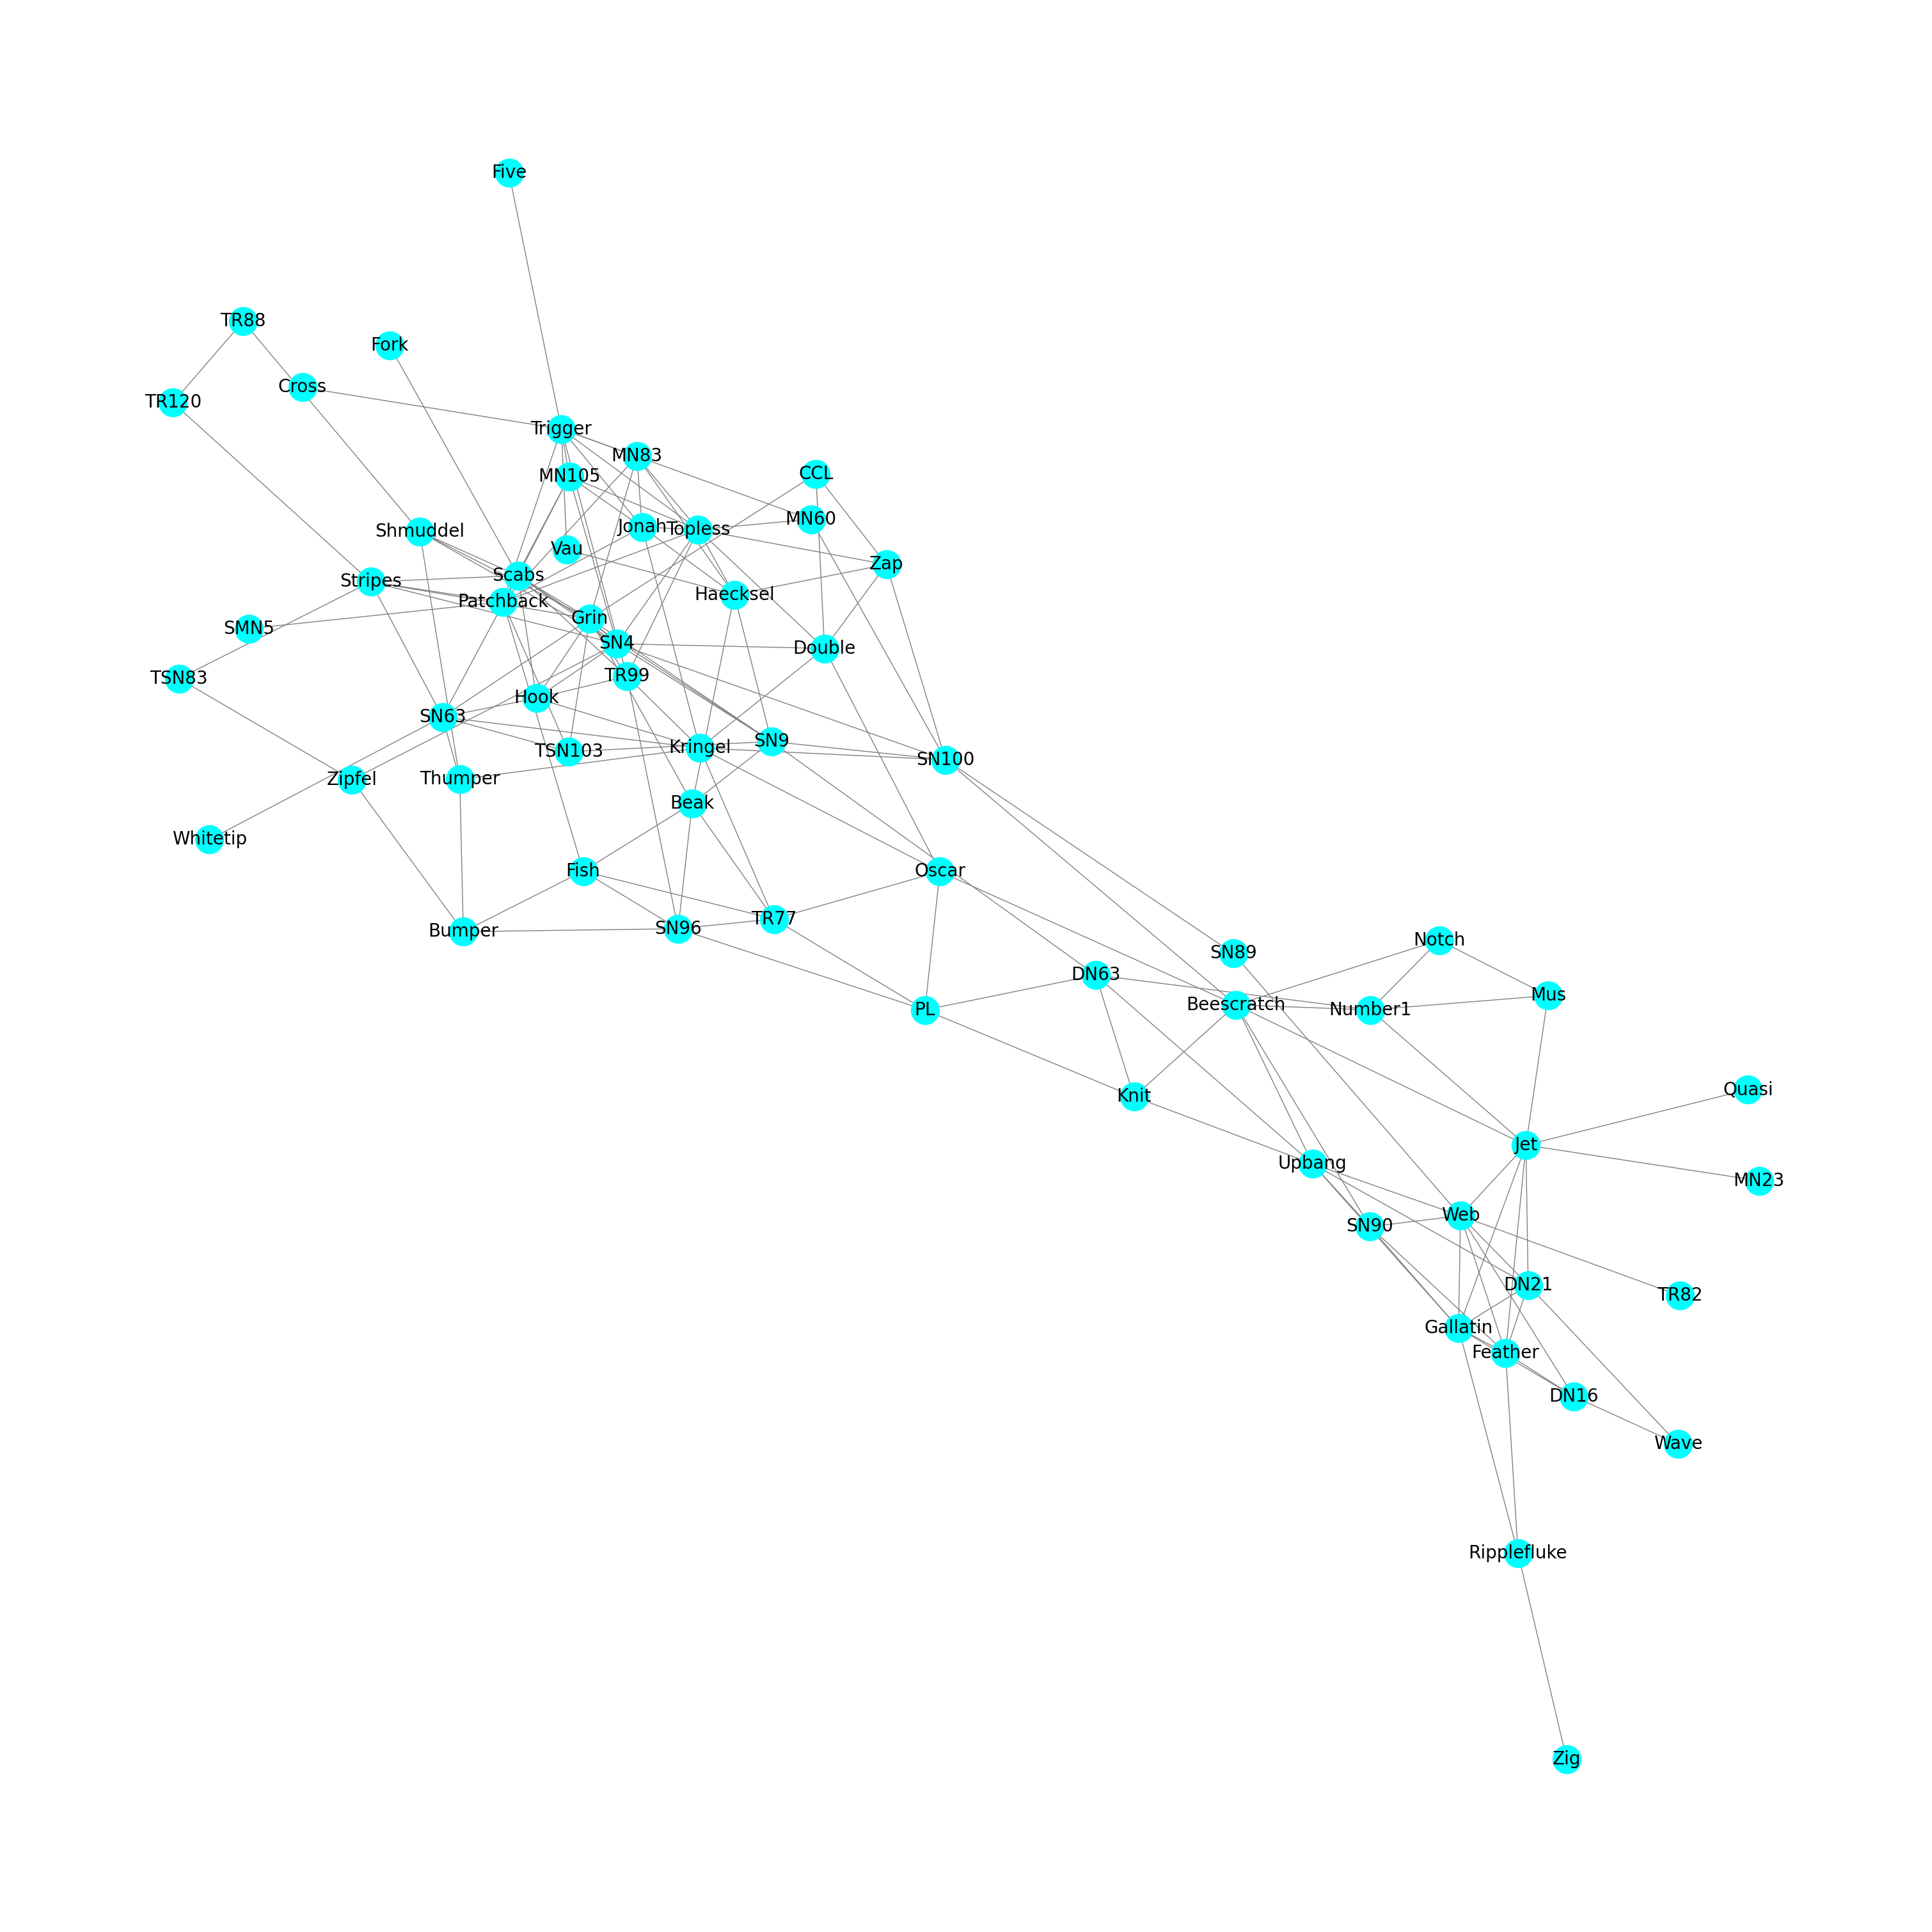

In [11]:
#Plots the graph for our whole network
plt.figure(figsize = (30,30) )
nx.draw(Dolphins_G, pos, node_color='cyan', 
        node_size=1000, edge_color='grey', with_labels=True, font_size = 20)

This code and graph represents the first plot of our network, where we can see a preliminary distribution of the relationships formed between the dolphins. Furthermore, it upholds the idea that our network is connected, unweighted, and undirected. 

### Understanding the Centrality of the Network

In [12]:
# Find the most central node(s) based on the 4 different centrality measures that we 
    #have explored
a = nx.degree_centrality(Dolphins_G)
d = nx.closeness_centrality(Dolphins_G)
b = nx.eigenvector_centrality(Dolphins_G)
c = nx.betweenness_centrality(Dolphins_G)

print('The person with highest degree centrality is', max(a, key=lambda key: a[key]))
print('The person with highest closeness centrality is', max(d, key=lambda key: d[key]))
print('The person with highest eigenvector centrality is', max(b, key=lambda key: b[key]))
print('The person with highest betweenness centrality is', max(c, key=lambda key: c[key]))

The person with highest degree centrality is Grin
The person with highest closeness centrality is SN100
The person with highest eigenvector centrality is Grin
The person with highest betweenness centrality is SN100


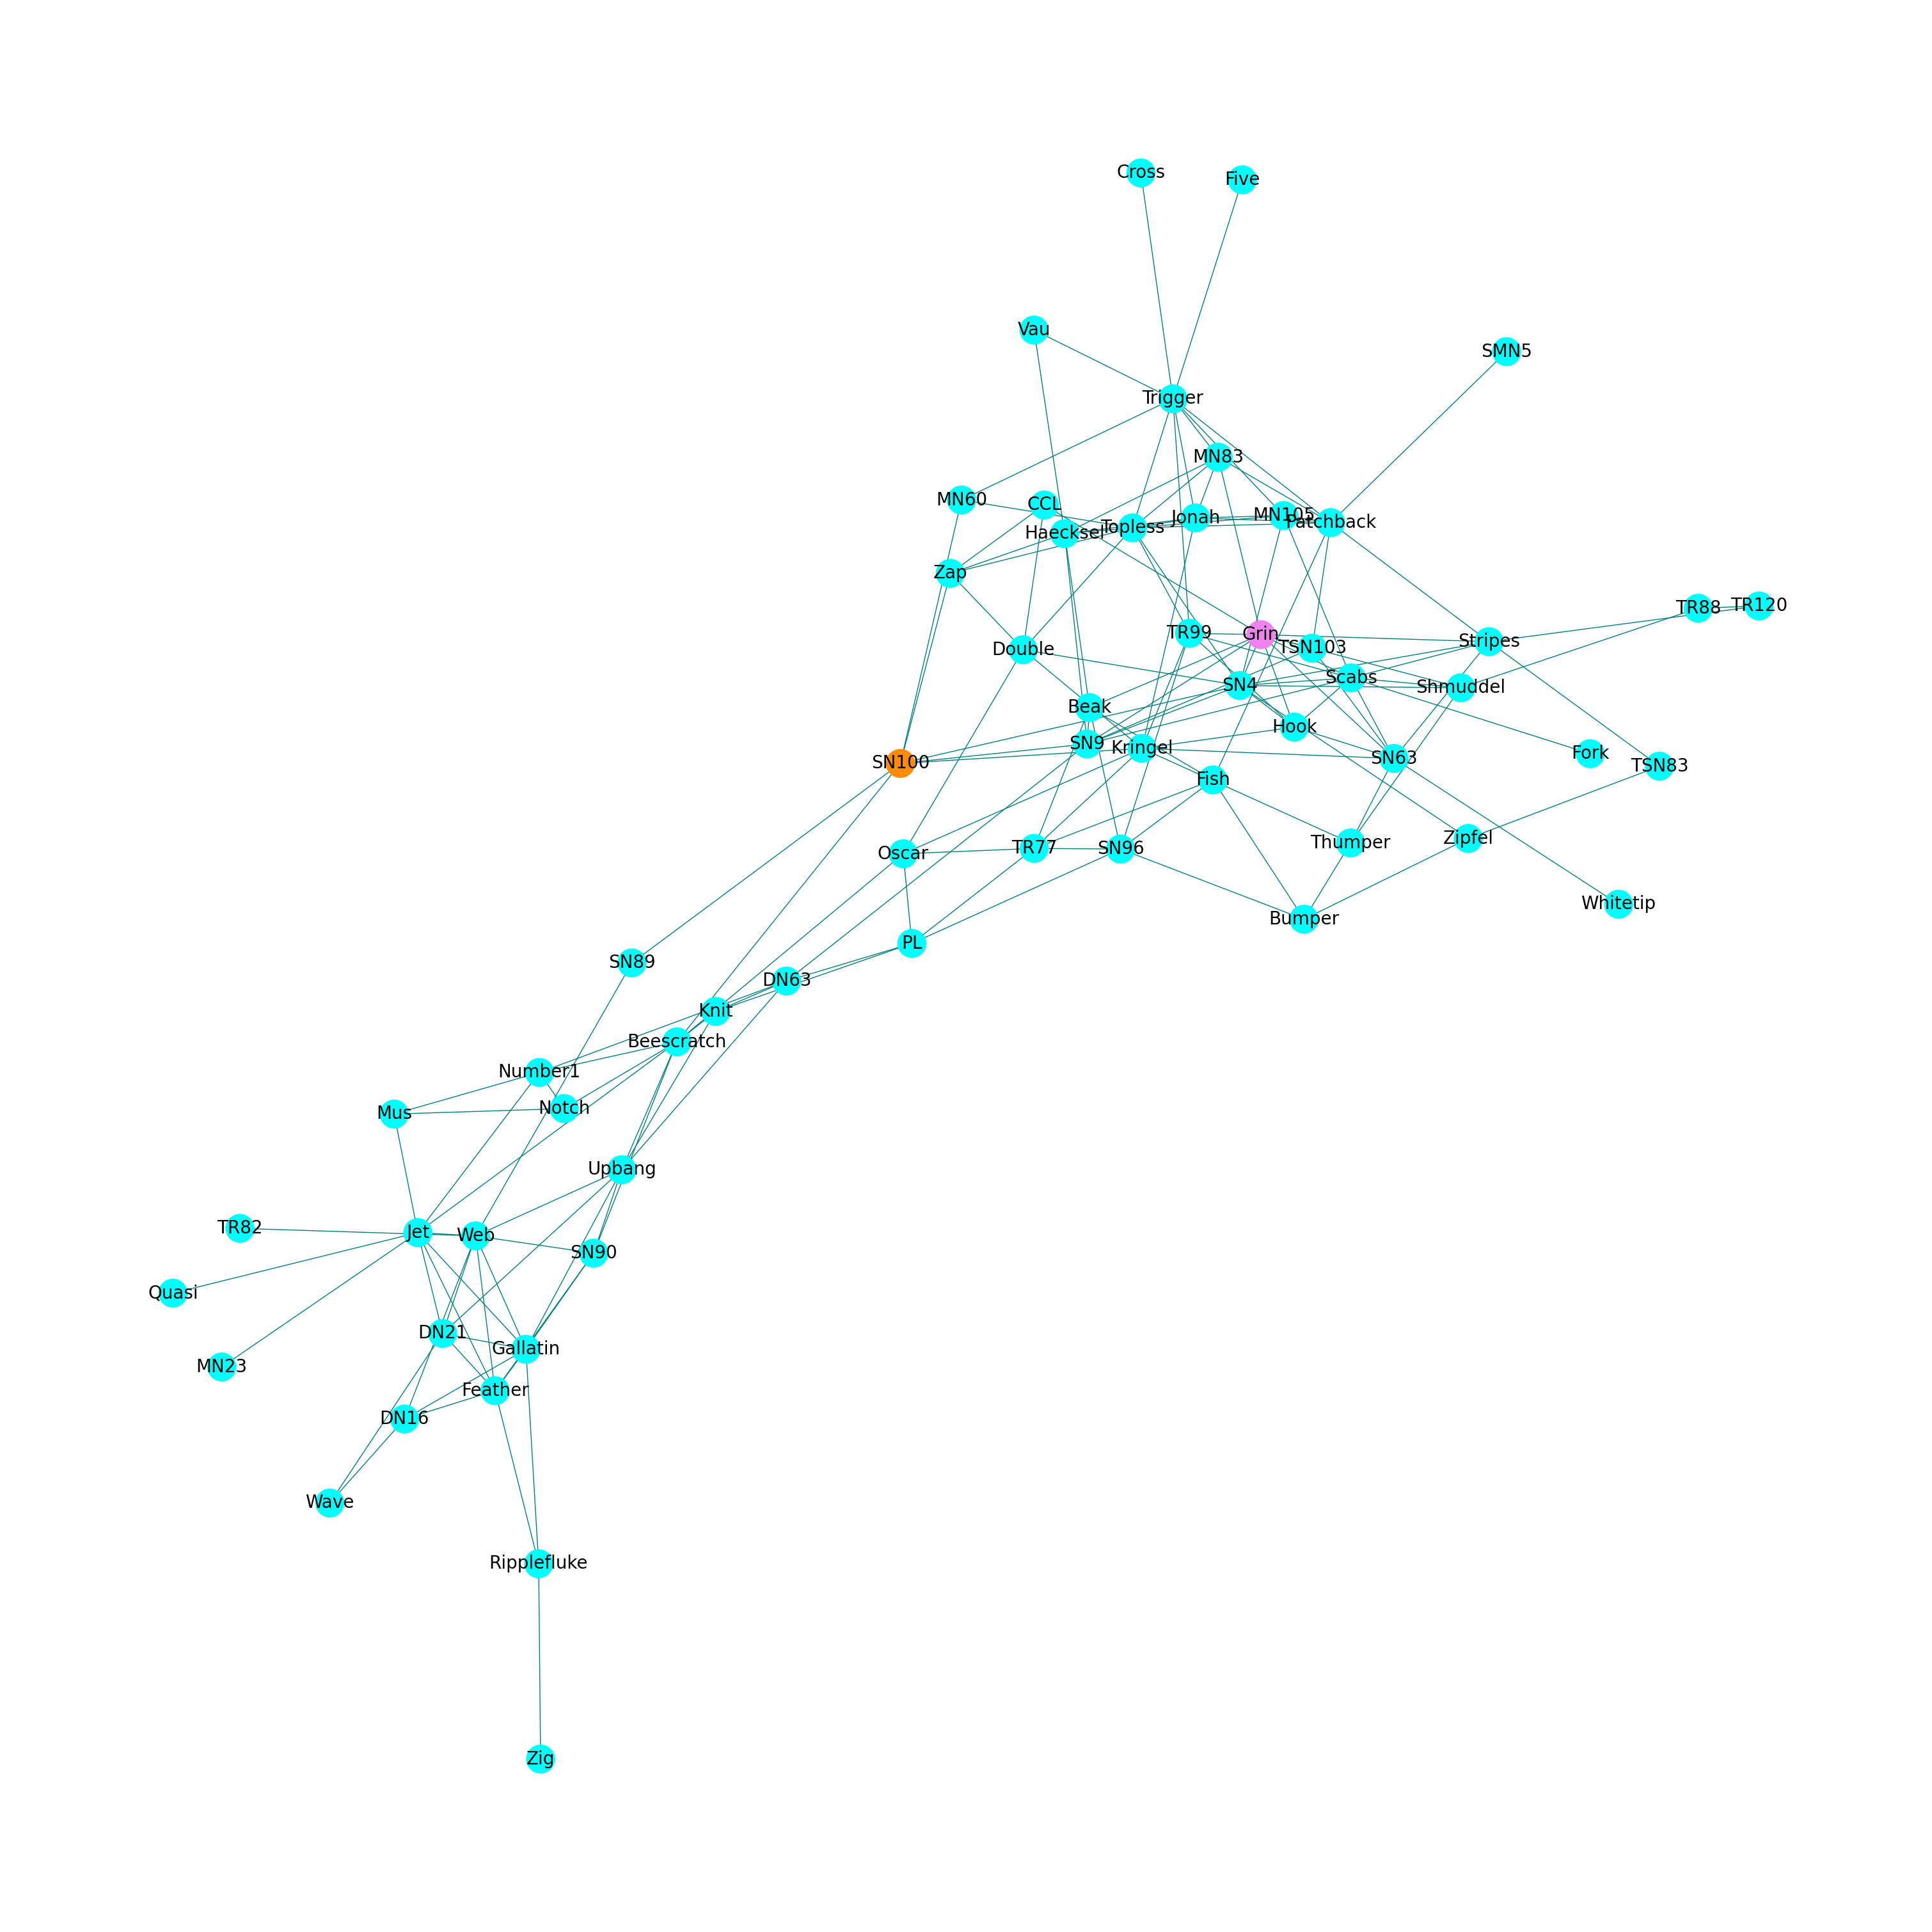

In [15]:
#Plot that outlines which are the most central nodes, or dolphins, in this specific network

plt.figure(figsize = (30,30))
k_pos = nx.spring_layout(Dolphins_G, k=0.05)
colors = ['cyan'] * len(Dolphins)
colors[14] = 'violet'
colors[36] = 'darkorange'
nx.draw(Dolphins_G, k_pos, node_color=colors, node_size=1000, edge_color='teal', with_labels=True, font_size=20)

Do the centrality metrics identify different node(s) as the "most central"?

Yes, a dolphin named Grin has the highest degree centrality and the highest eigenvector centrality, while a dolphin named SN100 has the highest closeness centrality and the highest betweenness centrality.

Given the context of your dataset, interpret which centrality metric you think is most informative. Explain.

Given the context of our dataset, degree centrality is most informative. Specifically with this dolphin population in the Doubtful Sound, the research seeks to show community structure and companionship between the dolphins. Degree centrality is based on the number of connections or edges a specific node has, therefore degree centrality shows us the dolphin, or node, with the most connections, companions, or associations to its neighbors and highlights the purpose of the research most effectively.

### Finding and Plotting Communities in the Network

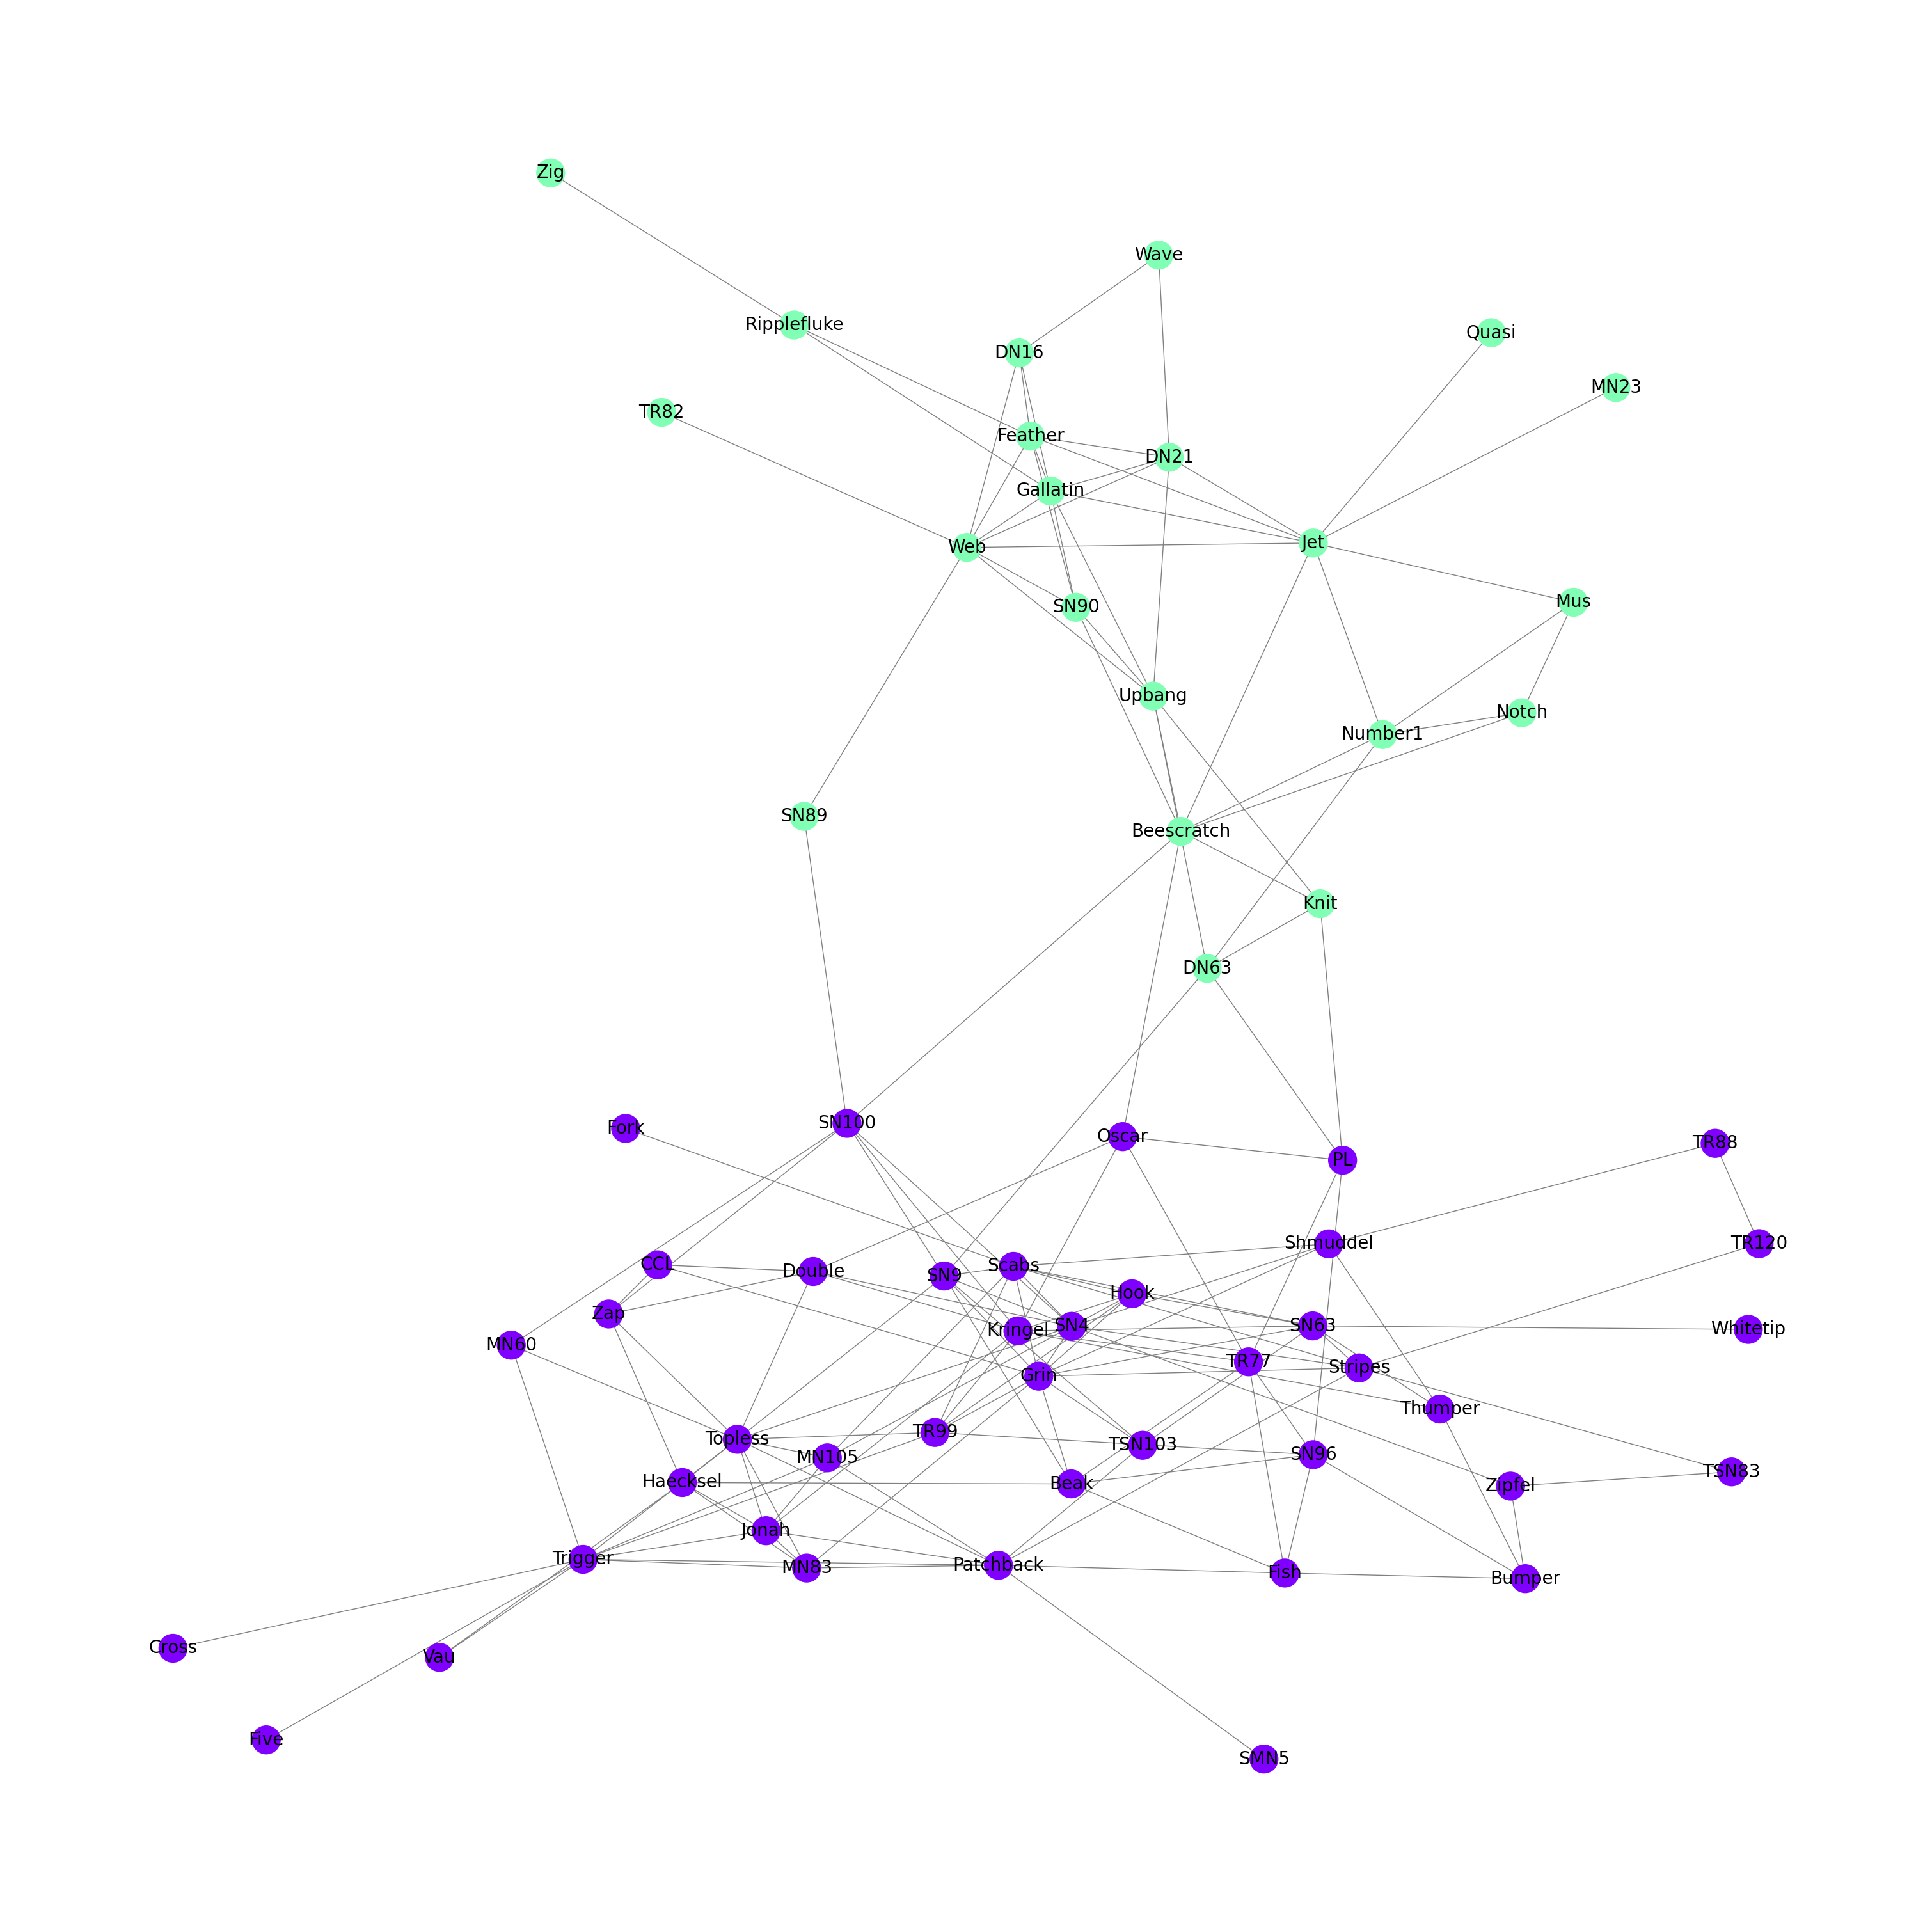

In [16]:
# Girvan-Newman method to plot the communities in the network
from networkx.algorithms.community import girvan_newman
comm = girvan_newman(Dolphins_G)
gn_communities = tuple(sorted(c) for c in next(comm))

# Plot the commmunities
import matplotlib.cm as cmx
def switch_to_numbers(G, C):
    num_comm = len(C)
    a = []
    for c in range(num_comm):
        a.append([0])
    for i, node in enumerate(G.nodes()):
        for j in range(num_comm):
            if node in C[j]:
                a[j].append(i)
    for c in range(num_comm):
        a[c] = a[c][1:]
    return a

def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure(figsize = (30,30))
    nx.draw(Network, pos, node_color=color_map, node_size=1000, edge_color='grey', with_labels=True, font_size = 20)
    plt.show()
    return

gn_communities_num = switch_to_numbers(Dolphins_G, gn_communities)
Plot_Comm(Dolphins_G, gn_communities_num, k_pos)

#### Do the identified communities make sense given the context of your data?
Yes, only having two heavily connected communities makes sense given the dolphin population in context. This study emphasizes that all members of the community are closely associated, having constant companionship, thus providing group stability. Due to these characteristics of the dolphin population, having only two heavily connected groups correlates with the context.

### Reporting on One Other Element of the Network

#### Degree Distribution


<BarContainer object of 12 artists>

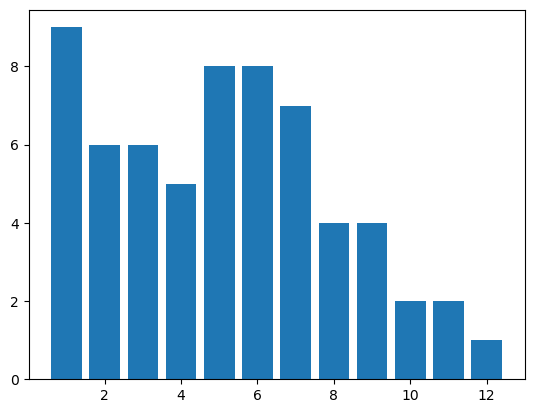

In [16]:
#Creates a plot of the degree distribution of the different nodes in the graph
degree_sequence = sorted((d for n, d in Dolphins_G.degree()), reverse=True)
plt.bar(*np.unique(degree_sequence, return_counts=True))

Another interesting metric to understand with the network data is the degree distribution of the different nodes. The bar chart above uses the x-axis to demonstrate the degree of a node, and the y-axis represents the number of nodes (or in this case dolphins) that have this degree. Ultimately, it is interesting to see that the majority of dolphins have a degree of 6 or less, which highlights the concept of stable groups, companions, and communities in this social network of dolphins. In this, we see the ideas of "constant companionship" as was described in the research paper, where this community of Doubtful Sound has nodes with a lower degree, and a different community structure than other dolphin communities that have been studied before [Lusseau 1]. 

### Conclusions About the Network

Do you think about this dataset differently than you did before?

From the onset, the research paper introduced the idea of this dolphin community being especially stable, with lower numbers of companions and associations. Through our own analysis, and using degree centrality and communities, this idea became much more clear and easier to understand, seeing how the realitionships were in fact stable, with low degree numbers and only 2 communities of dolphins existing in a network fo 62 dolphins. It is particularly interesting to understand this in comparison to our own human relationships, where we feel the results would look very different in a group of 62 humans, particularly that there would be far more communities. Perhaps this type of network only exists in the community of Doubtful Sound based off of the ecological factors at hand. Nontheless, our analysis allowed us to truly understand the claims made regarding the connectedness and stability of the group that were made in the research paper.

Did you learn anything about the discipline/domain the network lies in?

First and foremost, our knowledge regarding the interactions of dolphin communities was fairly preliminary prior to this project, so our research allowed us to get a stronger grasp on the discipline as a whole. Furthermore, a large lesson that came from our work is understanding how ecological factors impact relationships, and begs the question of how might this carry over into human relationships. In Doubtful Sound, their social network was defined by the area where they lived, as other dolphin communities that were studied were deemed more 'fluid'[Lusseau 1]. From this there seems to be an interesting paralell to a potential exploration of human networks that explores how ecological factors impact our own relationships.

What's something you wish you could learn about the network that you might not have a tool for?

One interesting element that we did not have the tool, or data, to explore would be the effect of time on the relationships. The data was taken over a period of a few years, and it would be interesting to understand how the relationships and degree of edges changed over time. However, it would be difficult to display this in one network with the tools at hand, and the data for only any given time might not be sufficient enough to demonstrate significant relationships. In that sense, we are somewhat limited in being able to represent this phenomenon of changes over time, nonetheless, we feel that it would be able to tell an interesting story about this social network of dolphins.


Is there any metadata about the nodes/edges that you wish you could have to interpret your findings better?

There are two interesting elements of metadata that we feel would allow us to better interpret our finidngs. The first is a type of weight associated with the edges that would allow us to understand the strength of the relationship between any two given nodes, or dolphins. This could provide interesting information about the differences between the communities, and the overall network as a whole. Meanwhile, another important piece of metadata would be the gender of the dolphins, which would allow us to understand the different kinds of relationships that exist, and whether or not the relationships were based off of companionship or a different type of association. 

### Citations

D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations, Behavioral Ecology and Sociobiology 54, 396-405 (2003).

D. Lusseau, The emergent properties of a dolphin social network, Proc. R. Soc. London B (suppl.) 270, S186-S188 (2003).

D. Lusseau, Evidence for social role in a dolphin social network, Preprint q-bio/0607048 (http://arxiv.org/abs/q-bio.PE/0607048)